In [2]:
import networkx as nx
from collections import deque

In [3]:
def find_augmentpath(N, s, t):

    # πの初期化
    Pi = [-1] * nx.number_of_nodes(N)

    # 訪れた点を格納するvisitedの初期化
    visited = set()

    # stackの初期化
    stack = deque()

    # スタックに最初に訪れるsを入れる
    stack.appendleft(s)

    # stackの中身が存在する間処理を行う。
    while stack:

        # 次に訪問する点をstackの先頭から取り出す
        v = stack.popleft()

        # 次の点がtのとき
        if v == t:

            # πとtrueのタプルを返す
            return (Pi, True)

        # vが未訪問のとき
        if v not in visited:

            # vを訪問済みにする
            visited.add(v)

            # vの隣接点を一つずつ取り出してwに代入
            for w in N.neighbors(v):

                # wが未訪問で辺v,wの重さが0でないとき
                if w not in visited and N.edges[v, w]['weight'] != 0:

                    # stackにwを入れる
                    stack.appendleft(w)

                    # wはvから訪れたことを記録
                    Pi[w] = v

    # tまでたどり着けなかったら、πとfalseを返す
    return (Pi, False)
def restore_shortestpath(u, v, Pi):
    path = []
    temp = v
    while temp != u:
        parent = Pi[temp]
        path.append((parent, temp))
        temp = parent
    path.reverse()
    return path
def min_capacity(N, path):
    min_cap = float("inf")
    for u, v in path:
        capacity = N.edges[u, v]["weight"]
        if capacity < min_cap:
            min_cap = capacity
    return min_cap

def increase_flow(G, N, path, amount, flow):
    for u, v in path:
        if G.has_edge(u, v):
            flow[(u, v)] += amount
        else:
            flow[(v, u)] -= amount

        N.edges[u, v]["weight"] -= amount
        
        if not N.has_edge(v, u):
            N.add_edge(v, u, weight = 0)

        N.edges[v, u]["weight"] += amount


In [4]:

def my_Ford_Fulkerson(G:nx.classes.DiGraph, s:int, t:int):
    N = G.copy()
    f= {}

    for u , v in N.edges:
        f[(u, v)] = 0
    Pi, is_found = find_augmentpath(N, s, t)

    while is_found:

        augmentpath = restore_shortestpath(s, t, Pi)
        min_cap = min_capacity(N, augmentpath)
        
        increase_flow(G, N, augmentpath, min_cap, f)
        Pi, is_found = find_augmentpath(N, s, t)


    return N, f

In [5]:
G = nx.read_weighted_edgelist("lec.edgelist", create_using=nx.DiGraph(), nodetype=int)

In [6]:
N, f = my_Ford_Fulkerson(G, 10, 11)

print( [[(s, t) ,N.edges[s, t]["weight"]] for s, t in N.edges()])
print(f)
print(len(f))

[[(0, 6), 1.0], [(0, 7), 0.0], [(0, 10), 1.0], [(6, 11), 0.0], [(6, 2), 1.0], [(7, 11), 0.0], [(7, 0), 1.0], [(1, 5), 1.0], [(1, 7), 1.0], [(1, 9), 0.0], [(1, 10), 1.0], [(5, 11), 0.0], [(5, 3), 1.0], [(9, 11), 0.0], [(9, 3), 0.0], [(9, 1), 1.0], [(2, 6), 0.0], [(2, 8), 1.0], [(2, 10), 1.0], [(8, 11), 0.0], [(8, 4), 1.0], [(3, 5), 0.0], [(3, 9), 1.0], [(3, 10), 1.0], [(4, 8), 0.0], [(4, 10), 1.0], [(10, 0), 0.0], [(10, 1), 0.0], [(10, 2), 0.0], [(10, 3), 0.0], [(10, 4), 0.0], [(11, 8), 1.0], [(11, 9), 1.0], [(11, 6), 1.0], [(11, 5), 1.0], [(11, 7), 1.0]]
{(0, 6): 0, (0, 7): 1.0, (6, 11): 1.0, (7, 11): 1.0, (1, 5): 0, (1, 7): 0, (1, 9): 1.0, (5, 11): 1.0, (9, 11): 1.0, (2, 6): 1.0, (2, 8): 0, (8, 11): 1.0, (3, 5): 1.0, (3, 9): 0.0, (4, 8): 1.0, (10, 0): 1.0, (10, 1): 1.0, (10, 2): 1.0, (10, 3): 1.0, (10, 4): 1.0}
20


In [7]:
for s in range(0, 5):
    f.pop((10, s))
for s in range(5, 10):
    f.pop((s, 11))
print(f)
print(len(f))

{(0, 6): 0, (0, 7): 1.0, (1, 5): 0, (1, 7): 0, (1, 9): 1.0, (2, 6): 1.0, (2, 8): 0, (3, 5): 1.0, (3, 9): 0.0, (4, 8): 1.0}
10


### 11-2 (1)

In [8]:
import matplotlib.pyplot as plt

In [9]:
G2 = nx.read_weighted_edgelist("project.edgelist", create_using=nx.DiGraph(), nodetype=int)

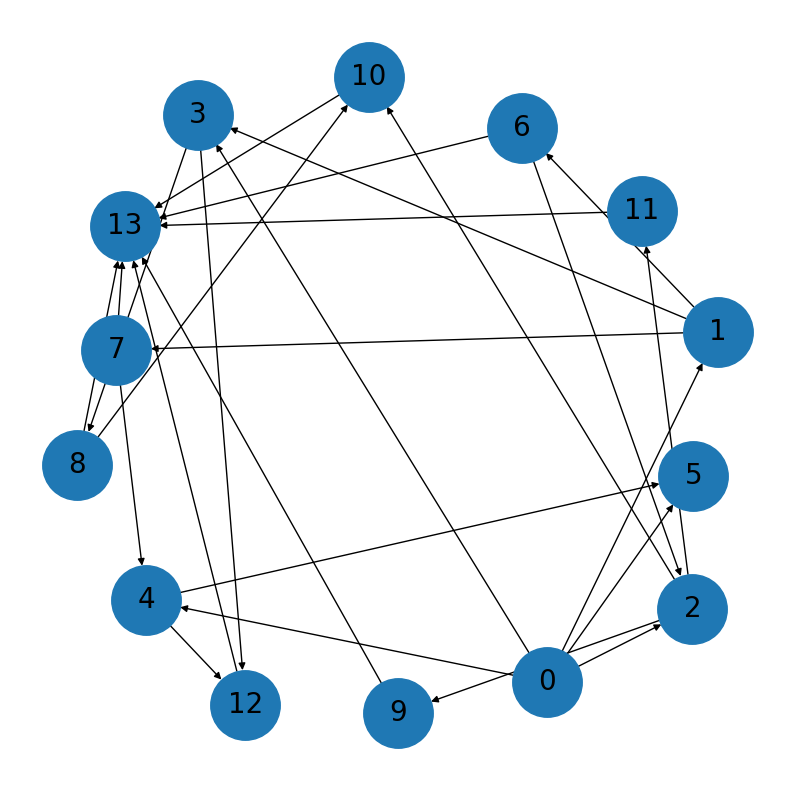

In [42]:

pos = nx.spring_layout(G2, 20)

plt.figure(figsize=(10,10))
nx.draw_networkx(G2, pos, node_size=2500, font_size=20, edge_color="k")
plt.axis("off")
plt.show()

### 11-2 (2)

In [11]:
def mincut_dfs(N, s):

    # 訪問済みの点の集合visitedの初期化
    visited = set()

    # 次に訪れる点を格納するstackの初期化
    stack = deque()

    # 始点sをstackに格納
    stack.appendleft(s)

    # stackの中身が存在する間、処理を行う
    while stack:

        # 次に訪れる点を取得
        v = stack.popleft()

        # vが訪問済みでないとき
        if not v in visited:

            # vをvisitedを追加
            visited.add(v)

            # vの隣接点をwに代入する
            for w in N.neighbors(v):

                # wが訪問済みでない かつ 辺v,wの重みが0でないとき
                if not w in visited and N.edges[v, w]['weight'] != 0:

                    # wを訪問予定にする
                    stack.appendleft(w)
    
    # Nの点の集合を取得
    N_set = set(N.nodes())

    # 訪問済み=プロジェクトを実行する => 集合A
    # 集合N - 集合A -> 集合B
    # 集合A, 集合Bを返す
    return visited, (N_set - visited)

In [12]:
G3 = nx.read_weighted_edgelist("ff2.edgelist", create_using=nx.DiGraph(), nodetype=int)
G2 = nx.read_weighted_edgelist("project.edgelist", create_using=nx.DiGraph(), nodetype=int)

In [13]:
N, f = my_Ford_Fulkerson(G2, 0, 13)
A, B = mincut_dfs(N, 0)
print("A: ", A)
print("B: ", B)


A:  {0, 2, 4, 5, 9, 10, 11, 12}
B:  {1, 3, 6, 7, 8, 13}
